# Plot sea level / CO2 / Temperature
***Code prepared by Alessio Rovere 
Contact: alessio.rovere@unive.it***

This script compares graphs of paleo sea level, CO2 and temperature in the same format. Results can be exported to a graphics software such as inkscape for editing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as patches
import plotly.graph_objects as go

## Sea level curves
The script plots the following sea level curves.

### Grant et al., 2014
*Grant, K.M., Rohling, E.J., Ramsey, C.B., Cheng, H., Edwards, R.L., Florindo, F., Heslop, D., Marra, F., Roberts, A.P., Tamisiea, M.E. and Williams, F., 2014. Sea-level variability over five glacial cycles. Nature communications, 5(1), pp.1-9.*

Retrieved from the original publication.

### Spratt and Lisiecki, 2016 (long and short interval)
*Rachel M. Spratt and Lorraine E. Lisiecki. 2016. A Late Pleistocene sea level stack. Climate of the Past, 12, 1079-1092. doi: 10.5194/cp-12-1079-2016*

Retrieved from https://www.ncdc.noaa.gov/paleo-search/study/19982

## Temperature and Greenhouse gases
The script plots data from this paper:
*Hansen, J., Sato, M., Russell, G., & Kharecha, P. (2013). Climate sensitivity, sea level and atmospheric carbon dioxide. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 371(2001), 20120294.*

Data retrieved from http://www.columbia.edu/~mhs119/RoySocData/

In [3]:
#Import and standardize sea level curves
#Grant2014
Grant2014=pd.read_excel('41467_2014_BFncomms6076_MOESM1342_ESM.xlsx',skiprows=13)
Grant2014=Grant2014[['time_kyr','RSL_Pmax_m','RSL_95high_m','RSL_95low_m']]
Grant2014.columns = ['Time (ka)','Prob max Sea Level (m)','95% top CI (m)','95% bottom CI (m)']
Grant2014['Time (a)']=Grant2014['Time (ka)']*-1000

#Spratt and Lisiecky, 2016
SprLis2016= pd.read_csv('spratt2016.txt',sep='\t',skiprows=95)
SprLis2016_long=SprLis2016[['age_calkaBP','SeaLev_longPC1','SeaLev_longPC1_err_lo','SeaLev_longPC1_err_up']]
SprLis2016_long.columns = ['Time (ka)','Sea Level (m)','95% bottom CI (m)','95% top CI (m)']
SprLis2016_short=SprLis2016[['age_calkaBP','SeaLev_shortPC1','SeaLev_shortPC1_err_lo','SeaLev_shortPC1_err_up']]
SprLis2016_short.columns = ['Time (ka)','Sea Level (m)','95% bottom CI (m)','95% top CI (m)']
SprLis2016_short['Time (a)']=SprLis2016_short['Time (ka)']*-1000
SprLis2016_long['Time (a)']=SprLis2016_long['Time (ka)']*-1000

#Import and standardize CO2 data
CO2Hans=pd.read_csv('Hansen_et_al_2013/Fig5a_CO2.txt',sep=',')
#Import and standardize temperature data
T_HANS=pd.read_csv('Hansen_et_al_2013/Fig6_d18O.txt',delim_whitespace=True)

<ipython-input-3-e8b2f53478c3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SprLis2016_short['Time (a)']=SprLis2016_short['Time (ka)']*-1000
<ipython-input-3-e8b2f53478c3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SprLis2016_long['Time (a)']=SprLis2016_long['Time (ka)']*-1000


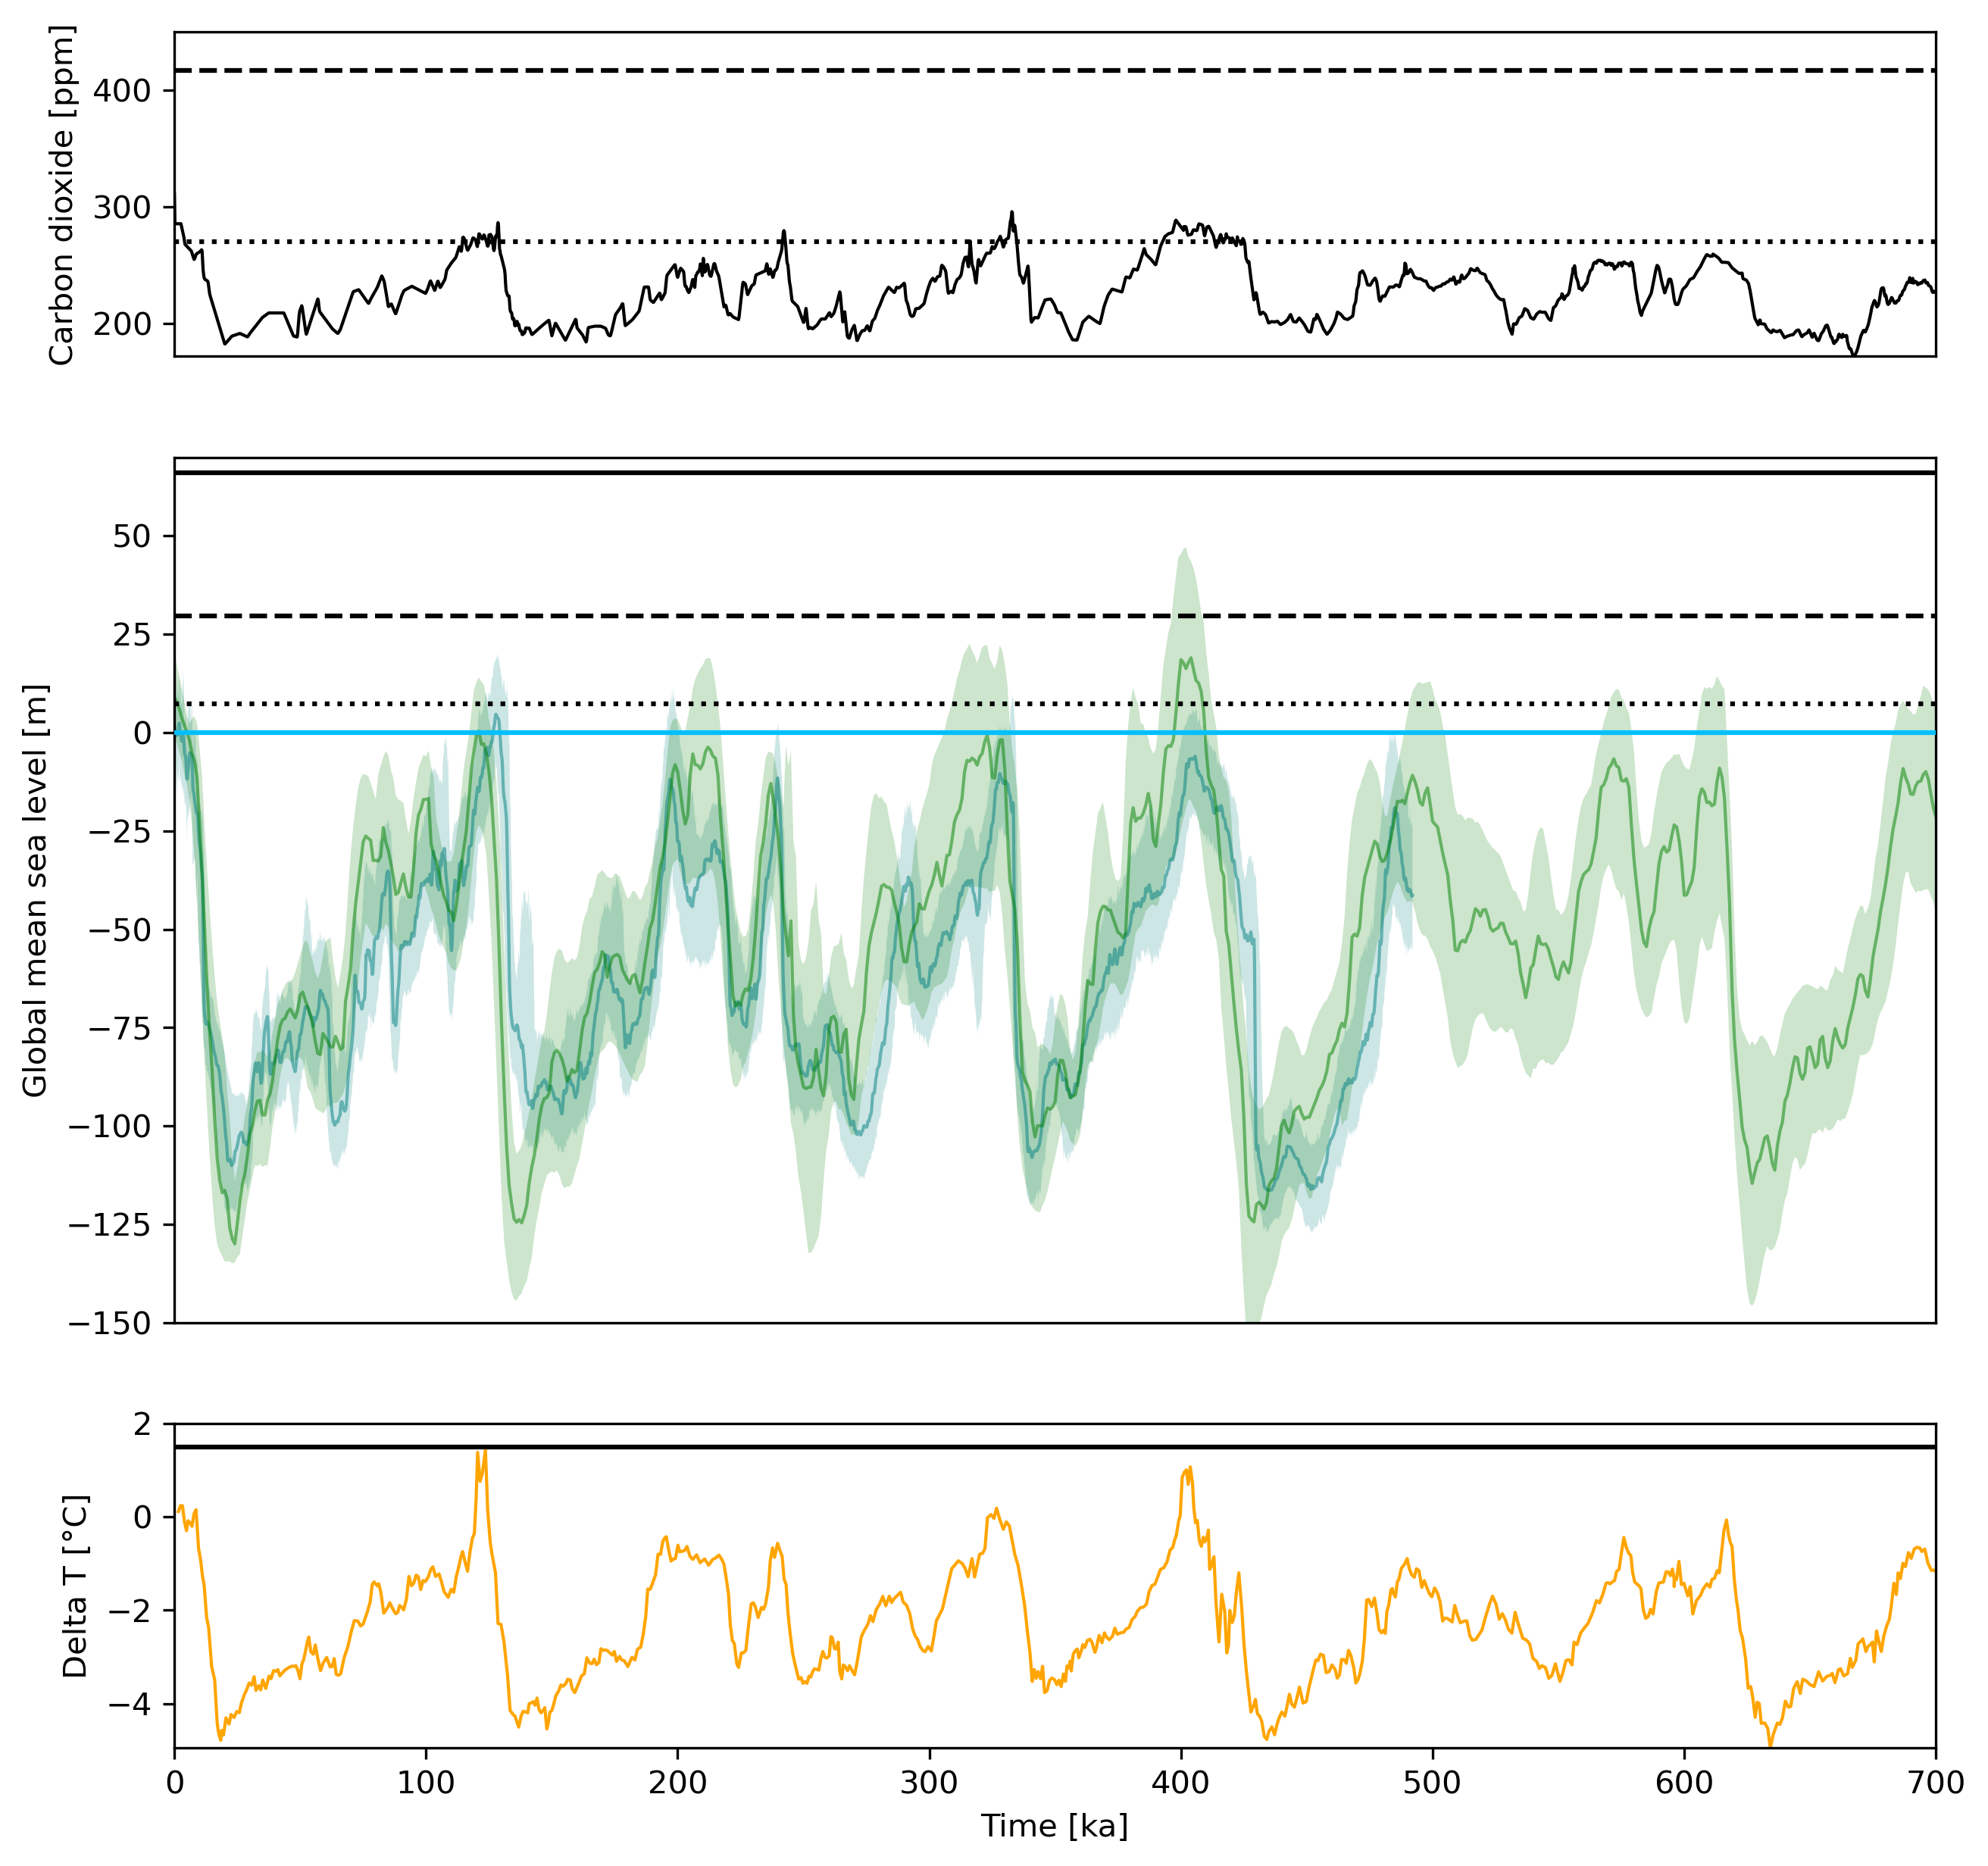

In [33]:
minTime=0
maxTime=700

axs=(plt.figure(num=None, figsize=(10, 10), dpi=300, facecolor='w', edgecolor='k')
     .subplots(3,gridspec_kw={'height_ratios': [1.5,4,1.5]}))

#plt.subplot(3,2,1)
#ax = figure.gca()

#Plot reference lines - comment to unshow
axs[1].axhline(y=0, color='deepskyblue', linestyle='-',zorder=200,label='Modern sea level')
axs[1].axhline(y=7.4, color='k', linestyle='dotted',zorder=200,label='GrIS (7.4m)')
#axs[1].axhline(y=7.4+3.3, color='k', linestyle='dashed',zorder=200,label='GrIS (7.4m)+WAIS(3.3m)')
axs[1].axhline(y=7.4+3.3+19, color='k', linestyle='dashed',zorder=200,label='GrIS (7.4m)+WAIS(3.3m)+EAIS(19m)')
axs[1].axhline(y=66, color='k', linestyle='-',zorder=200,label='Ice-free line (Miller et al., 2020)')
axs[1].plot( 'Time (ka)', 'Prob max Sea Level (m)', data=Grant2014,alpha=0.5, color='teal',linewidth=1,label='Grant et al., 2014')
axs[1].fill_between('Time (ka)', '95% top CI (m)','95% bottom CI (m)',data=Grant2014, facecolor='teal', alpha=0.2)    
axs[1].plot( 'Time (ka)', 'Sea Level (m)', data=SprLis2016_long,alpha=0.5, color='green',linewidth=1,label='Spratt and Lisiecki, 2016 (long)')
axs[1].fill_between('Time (ka)', '95% top CI (m)','95% bottom CI (m)',data=SprLis2016_long, facecolor='green', alpha=0.2)
minSL=-150
maxSL=70
axs[1].set_xlabel('Time [ka]')
axs[1].get_xaxis().set_visible(False)
axs[1].set_ylabel('Global mean sea level [m]')
axs[1].axis([minTime,maxTime,minSL,maxSL])


axs[0].axhline(y=270, color='k', linestyle='dotted',zorder=200,label='Pre-industrial CO2')
axs[0].axhline(y=417, color='k', linestyle='dashed',zorder=200,label='Average CO2 2021')
axs[0].plot('Time(kyBP)', 'CO2(ppm)', data=CO2Hans,linewidth=1,label='CO2, Hansen et al., 2016',color='k')
axs[0].set_xlabel('Time [ka]')
axs[0].get_xaxis().set_visible(False)
axs[0].set_ylabel('Carbon dioxide [ppm]')
minCO2=min(CO2Hans['CO2(ppm)'])
maxCO2=450
axs[0].axis([minTime,maxTime,minCO2,maxCO2])

axs[2].axhline(y=1.5, color='k', linestyle='-',zorder=200,label='Pre-industrial CO2')
axs[2].plot('Time(kyBP)', 'F_delta18O(W/m2)', data=T_HANS,linewidth=1,label='Temperature, Hansen et al., 2016',color='orange')
axs[2].set_xlabel('Time [ka]')
axs[2].set_ylabel('Delta T [°C]')
minCO2=min(T_HANS['F_delta18O(W/m2)'])
maxCO2=2
axs[2].axis([minTime,maxTime,minCO2,maxCO2])

plt.savefig('SL_Temp_CO2.svg')  
